# Jupyter Notebook for IBM Data Science Capstone Project  

### Import the python libraries

In [22]:
import pandas as pd
import numpy as np
import scipy

# Print a hello world message
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


**Install & import packages for Data Visualizaton**

In [27]:
%%capture
! pip install seaborn

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Methodology (Data Analysis) 
#### (1) Specify Data Requirements  (2) Collect the Data (3) Understand the Data (4) Prepare the Data


#### Understand Data - Prescription Rates

In [47]:
# Define a DataFrame named prefixed with pkop to signify Prescription Rate of Opioids
proDataFrame = pd.read_csv('https://datascience-capstone-project.s3.us-south.cloud-object-storage.appdomain.cloud/USCountyPainKillerPrescribingRates2017.csv')
proDataFrame.head()

proDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969 entries, 0 to 2968
Data columns (total 4 columns):
CountyName          2969 non-null object
StateCode           2969 non-null object
CountyCode          2969 non-null int64
PrescriptionRate    2955 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 92.9+ KB


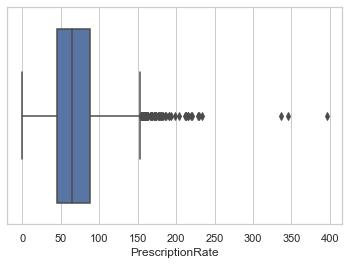

In [48]:
sns.set(style='whitegrid')
sns.boxplot(x="PrescriptionRate", data=proDataFrame)


#### Understand Data - Income Per Capita

In [49]:
ipcDataFrame = pd.read_csv("https://datascience-capstone-project.s3.us-south.cloud-object-storage.appdomain.cloud/USCountyIncomePerCapita2018.csv")
ipcDataFrame.head()

,State,StateCode,County,CountyCode,IncomePC2018
0,Alabama,AL,Autauga,1001,41618
1,Alabama,AL,Baldwin,1003,45596
2,Alabama,AL,Barbour,1005,35199
3,Alabama,AL,Bibb,1007,30254
4,Alabama,AL,Blount,1009,34976


In [51]:
ipcDataFrame['IncomePC2018'].describe()

count      3080.000000
mean      44112.225000
std       12738.971561
min       18541.000000
25%       36557.750000
50%       41961.000000
75%       48748.500000
max      251728.000000
Name: IncomePC2018, dtype: float64

In [73]:
ipcbsDataFrame = ipcDataFrame[['State', 'IncomePC2018']]
#ipcbsDataFrame.head()

ipcgbsDataFrame = ipcbsDataFrame.groupby(['State'],as_index=False).mean()

ipcgbsDataFrame.set_index('State', inplace=True)

ipcgbsDataFrame.head()


,IncomePC2018
State,
Alabama,37063.179104
Alaska,62513.413793
Arizona,37879.266667
Arkansas,35725.506667
California,56852.448276


Text(0.5, 1.0, 'State Wide Income for the year 2018')

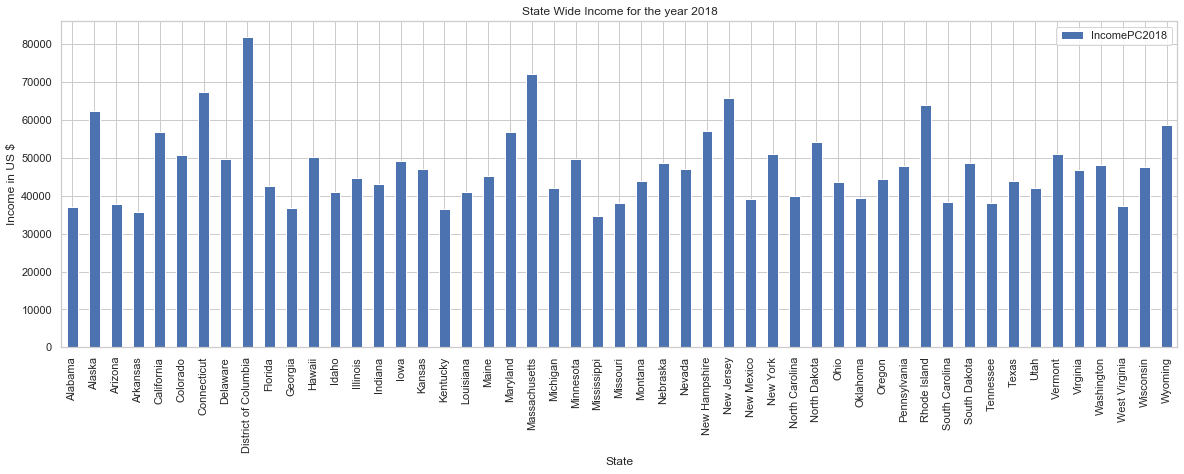

In [75]:
# Plot the data (barchart)
ipcgbsDataFrame.plot(kind='bar', figsize=(20, 6))

plt.xlabel('State') # add to x-label to the plot
plt.ylabel('Income in US $') # add y-label to the plot
plt.title('State Wide Income for the year 2018') # add title to the plot


In [44]:
mhvDataFrame = pd.read_csv('https://datascience-capstone-project.s3.us-south.cloud-object-storage.appdomain.cloud/USCountyMedianHomeValueAvgByZipCode.csv')
mhvDataFrame.head()

,StateCode,County,MedianHousePrice
0,AK,Anchorage,306691.67
1,AK,Fairbanks North Star,193461.38
2,AK,Juneau,349950.00
3,AK,Kenai Peninsula,238358.50
4,AK,Kodiak Island,332500.00


In [76]:
mhvDataFrame['MedianHousePrice'].describe()

count    1.979000e+03
mean     2.251729e+05
std      1.658781e+05
min      5.000000e+04
25%      1.399000e+05
50%      1.855385e+05
75%      2.640467e+05
max      2.772500e+06
Name: MedianHousePrice, dtype: float64

**Consolidate data by State & Median House Price**

In [79]:
# Consolidate median Home Value by Price
mhvbpDataFrame = mhvDataFrame[['StateCode', 'MedianHousePrice']]
#ipcbsDataFrame.head()

mhvbpgDataFrame = mhvbpDataFrame.groupby(['StateCode'],as_index=False).mean()

mhvbpgDataFrame.set_index('StateCode', inplace=True)

mhvbpgDataFrame.head()

,MedianHousePrice
StateCode,
AK,297476.650000
AL,180574.334186
AR,143908.081220
AZ,247627.716923
CA,520442.412963


Text(0.5, 1.0, 'State Wide Median Home Values year 2017')

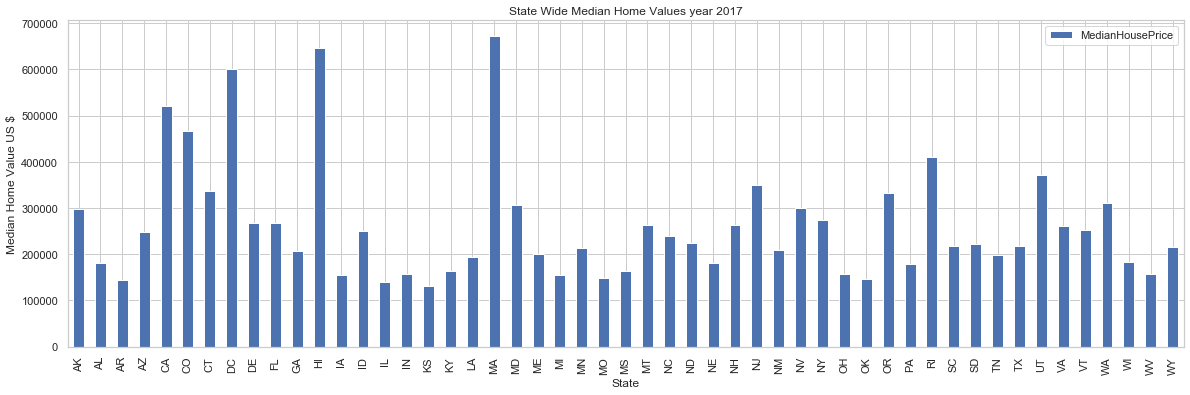

In [80]:
# plot the data
mhvbpgDataFrame.plot(kind='bar', figsize=(20, 6))

plt.xlabel('State') # add to x-label to the plot
plt.ylabel('Median Home Value US $') # add y-label to the plot
plt.title('State Wide Median Home Values year 2017') # add title to the plot

#### Prepare Data - cross-reference table

In [45]:
xrfDataFrame = pd.read_csv("https://datascience-capstone-project.s3.us-south.cloud-object-storage.appdomain.cloud/USCountyGazetteer2019.csv")
xrfDataFrame.head()

,StateCode,CountyCode,ANSICODE,CountyName,LandAreaSqMi,WaterAreaSqMi,Latitude,Longitude
0,AL,1001,161526,Autauga,594.444,9.926,32.532237,-86.646440
1,AL,1003,161527,Baldwin,1589.823,437.446,30.659218,-87.746067
2,AL,1005,161528,Barbour,885.008,19.507,31.870253,-85.405104
3,AL,1007,161529,Bibb,622.461,3.707,33.015893,-87.127148
4,AL,1009,161530,Blount,644.831,5.798,33.977358,-86.566440
